In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 174 µs (started: 2021-11-08 12:27:07 +00:00)


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MA4270/emails.csv")

time: 3.5 s (started: 2021-11-08 12:27:10 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

time: 571 ms (started: 2021-11-08 12:27:18 +00:00)


In [ ]:
X_train.shape
#y_test.shape

(3620, 3000)

time: 7.66 ms (started: 2021-11-08 12:27:21 +00:00)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

time: 2.87 s (started: 2021-11-08 12:27:25 +00:00)


In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.9722938144329897
Precision: 0.9478458049886621
time: 9.19 ms (started: 2021-11-08 12:27:48 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

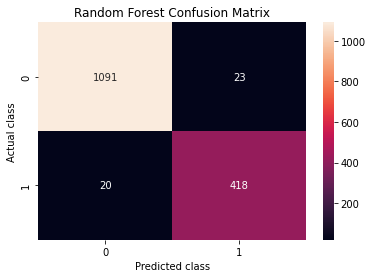

time: 318 ms (started: 2021-11-08 12:27:50 +00:00)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Random Forest Confusion Matrix')
ax.set_xlabel('Predicted class')
ax.set_ylabel('Actual class')

plt.savefig('rf.png')
files.download('rf.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

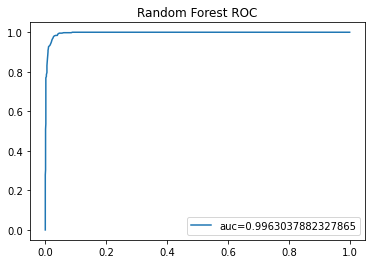

time: 325 ms (started: 2021-11-08 12:38:16 +00:00)


In [ ]:
from sklearn import metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc=4)
plt.title('Random Forest ROC')
plt.savefig('rf.png')
files.download('rf.png')
plt.show()